# Dimensionality Reduction techniques

Dataset - Loan eligibility

source: https://github.com/IBM/Predict-loan-eligibility-using-IBM-Watson-Studio

The dataset has 12 columns out of which one is a target. The rest are the features. We will reduce this features count by applying various dimensionality reduction techniques and study their effect on model performance. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
!wget https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/train.csv

--2022-09-07 10:59:45--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37397 (37K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  36.52K  --.-KB/s    in 0.002s  

2022-09-07 10:59:46 (15.5 MB/s) - ‘train.csv’ saved [37397/37397]



In [3]:
df = pd.read_csv("train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Columns with large number of missing values 

Eliminate columns which have large number of missing values, as imputing data into those columns may not make sense or may not be viable.

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now, let us see the proportion of null values per feature:

In [6]:
df.isnull().sum()/len(df)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Dropping columns
columns having large percentage of nulls

In [7]:
a = df.isnull().sum()/len(df)
variables = df.columns[:-1]
variable = []
for i in range(0,len(df.columns[:-1])):
    if a[i]>0.03:   #setting the threshold as 3%
        variable.append(variables[i])
print(variable)

['Self_Employed', 'LoanAmount', 'Credit_History']


The Self_Employed, LoanAmount and Credit history features would be dropped as the number of missing values in these columns cross our threshold limit. 

### Imputing values

Plot histograms

Text(0.5, 0.98, 'Histograms of  numerical features with missing values')

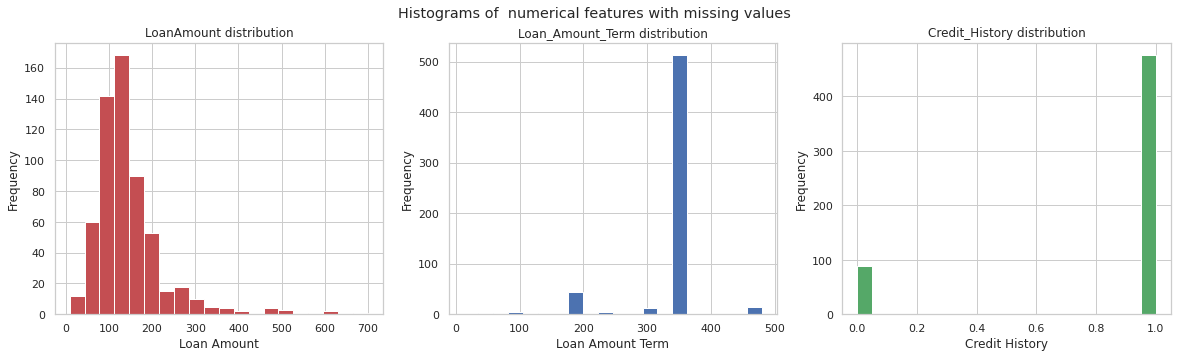

In [8]:
sns.set(style='whitegrid')
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))

df['LoanAmount'].hist(bins=20, color='r', ax=ax1)
ax1.set_title('LoanAmount distribution')
ax1.set_xlabel('Loan Amount')
ax1.set_ylabel("Frequency")

df['Loan_Amount_Term'].hist(bins=20, color='b', ax=ax2)
ax2.set_title('Loan_Amount_Term distribution')
ax2.set_xlabel('Loan Amount Term')
ax2.set_ylabel("Frequency")

df['Credit_History'].hist(bins=20, color='g', ax=ax3)
ax3.set_title('Credit_History distribution')
ax3.set_xlabel('Credit History')
ax3.set_ylabel("Frequency")

f.suptitle('Histograms of  numerical features with missing values')

We will use median for loan amount column and mode for the other two columns for imputing the missing values. 

In [9]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

## Variance checking

Convert categorical columns

In [10]:
label_encoder = LabelEncoder()
columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']
for i in columns:
  df[i]= label_encoder.fit_transform(df[i])

Compute variance

In [11]:
df.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Gender               1.778751e-01
Married              2.351972e-01
Dependents           1.255589e+00
Education            1.708902e-01
Self_Employed        2.859435e-01
ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.074027e+03
Loan_Amount_Term     4.151048e+03
Credit_History       1.241425e-01
Property_Area        6.201280e-01
Loan_Status          2.152707e-01
dtype: float64

Filtering columns having low variance

In [12]:
numeric = df[df.columns[1:-1]]  # Omitting 'Loan_ID' and 'Loan_Status'
var = numeric.var()
numeric_cols = numeric.columns
variable = []
for i in range(0, len(numeric_cols)):
  if var[i]>=10:   # variance threshold
    variable.append(numeric_cols[i])

variable

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

The above four variables exihibit high variance and are thus significant to us, columns with low variance may be dropped. 

## Filtering highly correlated columns

When two variables carry approximately the same information, we say that they are highly correlated.

Text(0.5, 0.98, 'Correlation Matrix')

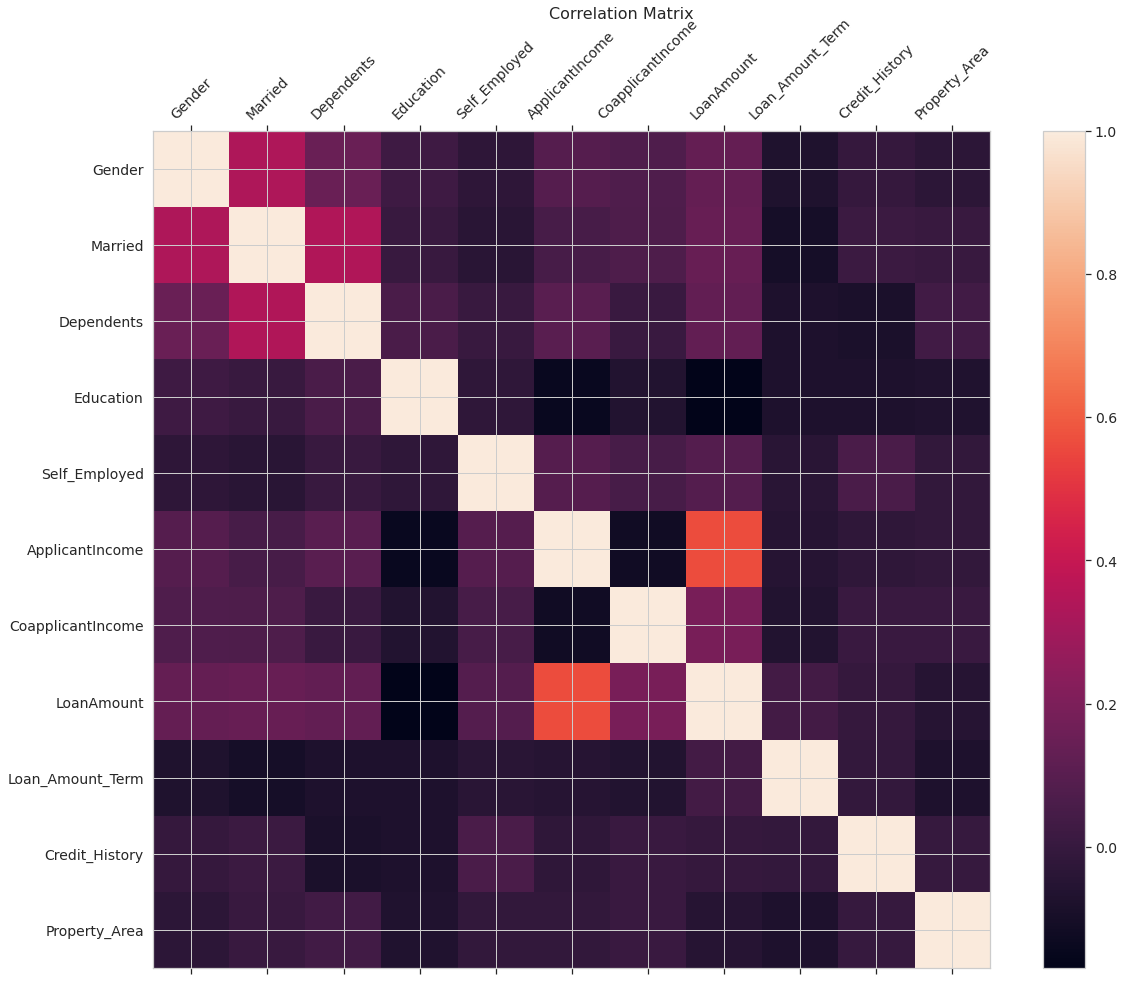

In [13]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.iloc[:,1:-1].corr(), fignum=f.number)
plt.xticks(range(df.iloc[:,1:-1].select_dtypes(['number']).shape[1]), df.iloc[:,1:-1].select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.iloc[:,1:-1].select_dtypes(['number']).shape[1]), df.iloc[:,1:-1].select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
f.suptitle('Correlation Matrix', fontsize=16)

In [14]:
feature_cols = df.columns[1:-1]
corr_values = df[feature_cols].corr()

indexes = np.tril_indices_from(corr_values)

for coord in zip(*indexes):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

corr_values['abs_correlation'] = corr_values.correlation.abs()

In [15]:
corr_values

,feature1,feature2,correlation,abs_correlation
0,Gender,Married,0.336094,0.336094
1,Gender,Dependents,0.149674,0.149674
2,Gender,Education,0.024382,0.024382
3,Gender,Self_Employed,-0.025022,0.025022
4,Gender,ApplicantIncome,0.094472,0.094472
5,Gender,CoapplicantIncome,0.073308,0.073308
6,Gender,LoanAmount,0.135505,0.135505
7,Gender,Loan_Amount_Term,-0.068522,0.068522
8,Gender,Credit_History,-0.003844,0.003844
9,Gender,Property_Area,-0.030903,0.030903


Plotting a histogram of the absolute values can help us define the threshold.

Text(0.5, 0.98, 'Histogram of absolute correlation values between features')

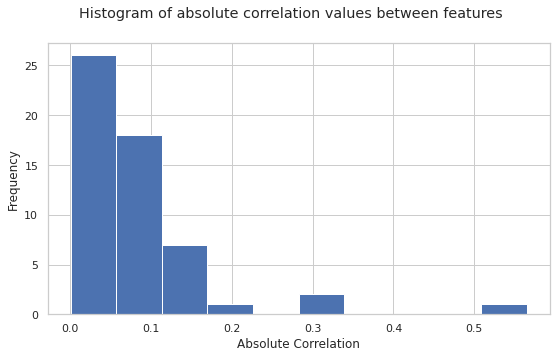

In [16]:
ax = corr_values.abs_correlation.hist(figsize=(9, 5))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

plt.suptitle('Histogram of absolute correlation values between features')

Filtering out column pairs having correlation index crossing a specified threshod.

In [17]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.5')

,feature1,feature2,correlation,abs_correlation
41,ApplicantIncome,LoanAmount,0.565181,0.565181


Therefore for our example 'Applicant Income' and 'Loan Amount' features are relatively high correlated so we can drop one of them.

## Random Forest

Using an in-built features importance package, eliminate features having low imporance. 

In [18]:
from sklearn.ensemble import RandomForestRegressor
df=df.drop(['Loan_ID'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
y=df['Loan_Status']
X=df.drop('Loan_Status', axis=1)
model.fit(X,y)

RandomForestRegressor(max_depth=10, random_state=1)

features importance

In [19]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances) 

plotting

Text(0.5, 0.98, 'Feature Importances')

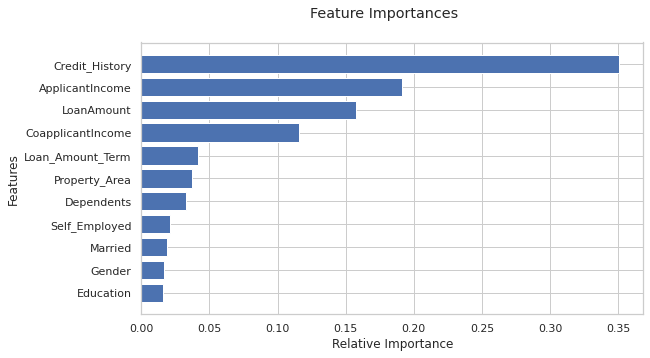

In [20]:
plt.figure(figsize=(9,5))
plt.barh(range(len(indices)), importances[indices], color='b', align='center' )
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.suptitle('Feature Importances')

## Backward feature elimination

We implement backward feature elimination using the recursive feature elimination (RFE) algorithm of the sklearn.


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

Get the top four features using the logistic regressor estimator.

In [22]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
estimator = LogisticRegression(max_iter=150)
selector = RFE(estimator, n_features_to_select = 4, step = 1)
selector.fit(X, y)
X_selected = selector.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Get a list of supporting features.


In [23]:
print('Support features')
print(selector.support_)

Support features
[ True  True False  True False False False False False  True False]


The first, second, fourth and tenth features are the most informative ones. 

Get features ranking

In [24]:
print('Features ranking by importance')
print(selector.ranking_)

Features ranking by importance
[1 1 4 1 3 8 7 6 5 1 2]


The features at index 0,1,3,9 are most significant.

Get names of significant features (top ranked)

In [25]:
def get_top_features():
  rank_1=[]
  for i in range(0,len(selector.ranking_)):
    if selector.ranking_[i]==1:
      rank_1.append(i)
  print('The four most informative features are:')
  print(X.iloc[:,rank_1].columns)

In [26]:
get_top_features()

The four most informative features are:
Index(['Gender', 'Married', 'Education', 'Credit_History'], dtype='object')


## Forward Feature Selection

Forward feature selection follows the reverse process of the backward elimination. We use sklearn's SelectKBest. 

In [27]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [28]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_selected = SelectKBest(f_classif, k=7).fit(X, y)
# transform raw values into scores
scores = -np.log10(X_selected.pvalues_)

Plot scores

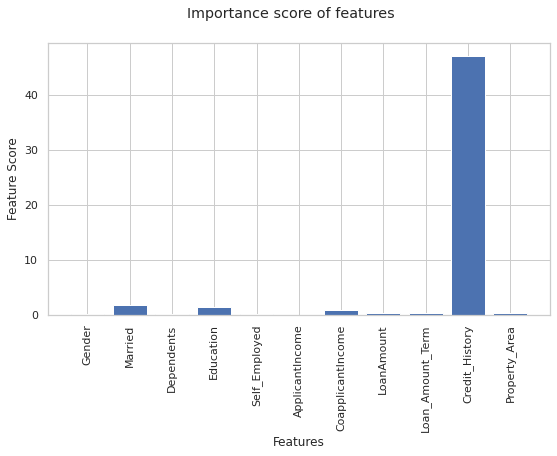

In [29]:
plt.figure(figsize=(9,5))
plt.bar(range(X.shape[1]), scores)
plt.xticks(range(X.shape[1]), X.columns, rotation='vertical')
plt.suptitle('Importance score of features')
plt.ylabel('Feature Score')
plt.xlabel('Features')
plt.show()

In [30]:
def get_best_features(scores):
  ind = np.argpartition(scores, -7)[-7:]
  print('The seven best features are:')
  print(X.iloc[:,ind].columns)

In [31]:
get_best_features(scores)

The seven best features are:
Index(['Loan_Amount_Term', 'Property_Area', 'LoanAmount', 'CoapplicantIncome',
       'Married', 'Credit_History', 'Education'],
      dtype='object')


## Factor Analysis

Variables within a group have a high correlation and low correlation to variables in other groups.

### Installing factor analyzer

In [32]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 635 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=246228d41673e53a8ad61381ebcb41477714614eb0a6af2495bdcb4ee81f666f
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


### Factoring

In [33]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df.shape[1])
fa.fit(df)
ev,_ = fa.get_eigenvalues()

### Scree plot

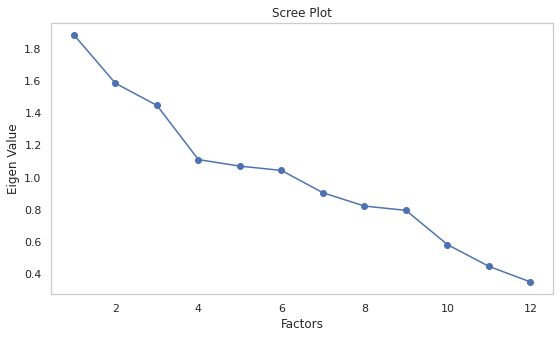

In [34]:
plt.figure(figsize=(9,5))
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In the plot above we can clearly see that there are  six components with eigenvalue greater than 1.0. 

## Principal Component Analysis (PCA)

PCA is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. The newly transformed features are called the Principal Components. 

In [35]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

Applying PCA

In [36]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kpca = KernelPCA(n_components=2, kernel='rbf', 
                 gamma=15, random_state=42)
X_kpca = kpca.fit_transform(X)

Plotting

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


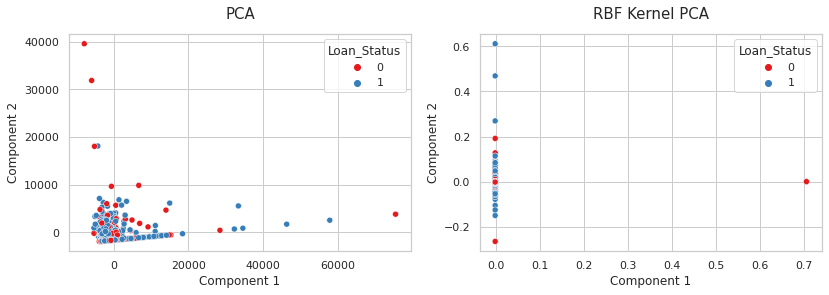

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_kpca[:, 0], X_kpca[:, 1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA", fontsize=15, pad=15)
ax[1].set_title("RBF Kernel PCA", fontsize=15, pad=15)
ax[0].set_xlabel("Component 1", fontsize=12)
ax[0].set_ylabel("Component 2", fontsize=12)
ax[1].set_xlabel("Component 1", fontsize=12)
ax[1].set_ylabel("Component 2", fontsize=12)
plt.show()

Kernel PCA has provided us the better separation. 

## Independent Component Analysis

Independent Component Analysis (ICA) is a technique in statistics used to detect hidden factors that exist in datasets of random variables, signals, or measurements. More aggressive in detecting independent components as compared to PCA.

In [38]:
from sklearn.decomposition import FastICA

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

ica = FastICA(n_components=2, 
              max_iter=500, 
              random_state=1000)
fast_ica=ica.fit_transform(X)


In [39]:
fast_ica

array([[ 0.00181132,  0.02230769],
       [-0.00553066,  0.00193297],
       [-0.01711518,  0.02356105],
       ...,
       [ 0.01675351,  0.01799071],
       [ 0.01333192,  0.02154258],
       [-0.00659704,  0.02286117]])

This shows how two components are related to each other for each observation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Component 2')

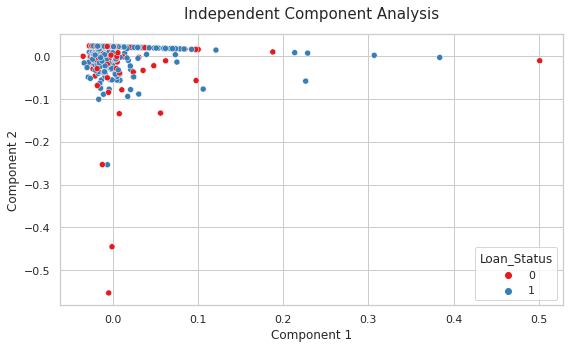

In [40]:
plt.figure(figsize=(9,5))
sns.scatterplot(fast_ica[:, 0], fast_ica[:, 1], hue=y, palette='Set1')
plt.title("Independent Component Analysis", fontsize=15, pad=15)
plt.xlabel("Component 1", fontsize=12)
plt.ylabel("Component 2", fontsize=12)

The graph show that the two compnents are very less dependent on each other.

##**Isometric mapping (Isomap)**

This method performs non-linear dimensionality reduction through Isometric mapping. It is an extension of Kernel PCA. It connects each instance by calculating the geodesic distance to its nearest neighbors. The number of neighbors to consider for each point is specified through the n_neighbors hyperparameter of the Isomap class of sklearn.

In [41]:
#import seaborn as sns
from sklearn.manifold import Isomap

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

isomap = Isomap(n_neighbors=5, n_components=2, 
                eigen_solver='auto')
X_isomap = isomap.fit_transform(X)

plotting

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Loan eligibility dataset')

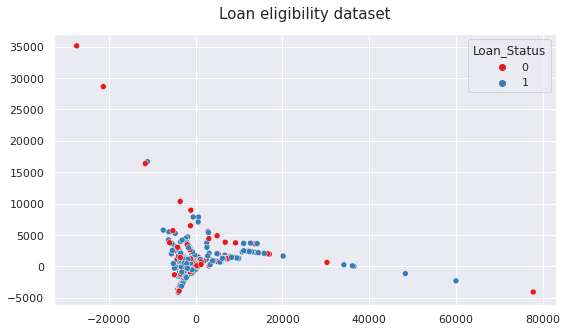

In [42]:
sns.set_style('darkgrid')
plt.figure(figsize=(9,5))
sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=y, palette='Set1')
plt.title("Loan eligibility dataset", fontsize=15, pad=15)

## t-distributed Stochastic Neighbor Embedding (t-SNE)

A non-linear dimensionality reduction  mostly used for data visualizations. Widely used in image processing and NLP. If the features count is very high (like 50 and above), first apply PCA. 

Applying t-SNE

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

sc = StandardScaler()
pca = PCA()
tsne = TSNE()
tsne_after_pca = Pipeline([
    ('std_scaler', sc),
    ('pca', pca),
    ('tsne', tsne)
])

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_tsne = tsne_after_pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


plotting

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'component2')

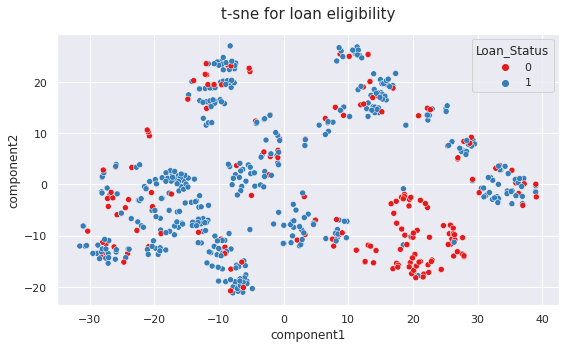

In [44]:
plt.figure(figsize=(9,5))
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y, palette='Set1')
plt.title("t-sne for loan eligibility", fontsize=15, pad=15)
plt.xlabel("component1")
plt.ylabel("component2")

## Uniform Manifold Approximation and Projection (UMAP)

A general purpose manifold learning and dimension reduction algorithm. Compatible with sklearn library, can be added to sklearn pipelines. A drop-in replacement to t-SNE. Uses the concept of k-nearest neighbor and optimizes the results using stochastic gradient descent. 

Reference: https://arxiv.org/pdf/1802.03426.pdf


In [45]:
!pip install umap-learn
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.7 MB/s 
     |████████████████████████████████| 1.1 MB 14.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=10e98abf20f3f0b6e51bf64ee0663019019c74519d9c5f4328377ab2c6a36b11
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=c045267eee584cdf884cfc1275f79a124ab9243e7b50ff235541f91f314557e4
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 959 kB/s 
     |████████████████████████████████| 76 kB 2.5 MB/s 


Restart after pip install completes

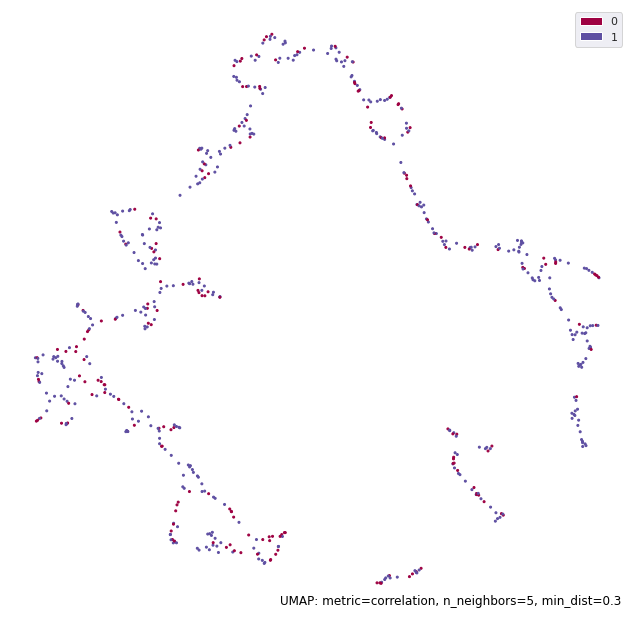

In [46]:
import umap
import umap.plot

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

mapper = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit(X)
umap.plot.points(mapper, labels=y)

We can see that the correlation between the components obtained from UMAP is quite less as compared to the correlation between the components obtained from t-SNE. Hence, UMAP tends to give better results.

## Singular value decomposition (SVD)

A dimension reduction technique for matrices to reduce its components. Matrix factorization into eigendecomposition. 

    Matrix = U.𝚺.V*

Works better with sparse data.

In [47]:
#preparing dataframe
df1 = pd.read_csv("train.csv")
df1= df1.drop('Loan_ID', axis=1)
df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)
df1['LoanAmount'].fillna(df1['LoanAmount'].median(), inplace=True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0], inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0], inplace=True)

label_encoder = LabelEncoder()
columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']
for i in columns:
  df1[i]= label_encoder.fit_transform(df1[i])

print(df1)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [48]:
df1 = df1[:].values

In [49]:
df1 = np.delete(df1,0,0)
X1=np.delete(df1,-1,axis=1)
print(X1)

[[  1.   1.   1. ... 360.   1.   0.]
 [  1.   1.   0. ... 360.   1.   2.]
 [  1.   1.   0. ... 360.   1.   2.]
 ...
 [  1.   1.   1. ... 360.   1.   2.]
 [  1.   1.   2. ... 360.   1.   2.]
 [  0.   0.   0. ... 360.   0.   1.]]


In [50]:
y1 = y.drop(1, axis=0)
y1.shape

(613,)

In [51]:
X1.shape

(613, 11)

In [52]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [53]:
X=X1
y=y1 

In [54]:
# get a list of models
def get_models():
	models = dict()
	for i in range(1,11):
		steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

In [55]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [56]:
# evaluate all models in the specified range
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.688 (0.004)
>2 0.688 (0.006)
>3 0.687 (0.009)
>4 0.685 (0.009)
>5 0.685 (0.009)
>6 0.686 (0.008)
>7 0.686 (0.008)
>8 0.685 (0.018)
>9 0.682 (0.025)
>10 0.804 (0.038)


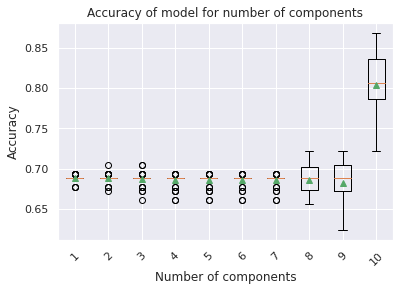

In [57]:
# plot model performance for comparison
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy of model for number of components')
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

We can see that for a higher number of components the random forest increase in accuracy and so does the standard deviation computed from the 10 data splits. This is why when we take 8, 9 or 10 components the accuracy is higher but so does the standard deviation which is definitely not good, whereas 7 components is the balance between both extremes reaching an accuracy around 0.69 and its standard deviation is considerably low.

## Linear Discriminant Analysis

A linear model for classification, dimensionality reduction and visualization.  Most commonly used for feature extraction in pattern classification problems.

We will use the digits dataset from sklearn library. The dataset contains 1797 instances having 10 classes.

In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [59]:
X, y = datasets.load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

In [60]:
dim = len(X[0])
n_classes = len(np.unique(y))

In [61]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

accuracies=[]
auc=[]
for comps in range(2,n_classes):
  lda = LinearDiscriminantAnalysis(n_components=comps)
  lda.fit(X_train, y_train)
  classifier = RandomForestClassifier(random_state=1, max_depth=10)
  classifier.fit(lda.transform(X_train), y_train)
  y_pred = classifier.predict(lda.transform(X_test))
  accuracies.append(metrics.accuracy_score(y_test,y_pred))


plotting accuracy versus number of components

Text(0.5, 1.0, 'Performance of classifier with LDA')

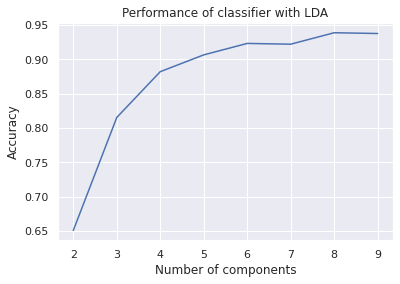

In [62]:
plt.plot(range(2,10), accuracies)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Performance of classifier with LDA')

In [63]:
classifier = RandomForestClassifier(random_state=1, max_depth=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy of classifier taking all features of dataset: ',metrics.accuracy_score(y_test,y_pred))

Accuracy of classifier taking all features of dataset:  0.9599555061179088


In [64]:
lda = LinearDiscriminantAnalysis(n_components=8)
lda.fit(X_train, y_train)
classifier = RandomForestClassifier(random_state=1, max_depth=10)
classifier.fit(lda.transform(X_train), y_train)
y_pred_8 = classifier.predict(lda.transform(X_test))
print('Accuracy of classifier reducing features to 8: ',metrics.accuracy_score(y_test,y_pred_8))

Accuracy of classifier reducing features to 8:  0.9388209121245829
